# Self-Attention Without Using Any Pretrained Weights

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
data[2010:].head(10)

,id,keyword,location,text,target
2010,2886,damage,NaN,Beach did damage to my shit,1
2011,2887,damage,NaN,@WonderousAllure crosses her arms to cover her...,0
2012,2888,damage,NaN,New post on my blog: http://t.co/Avu9b4k2rv \n...,0
2013,2889,damage,Charlotte NC,REPORTED: HIT &amp; RUN-IN ROADWAY-PROPERTY DA...,1
2014,2890,damage,NaN,Devil May Cry 4 Special Edition Vergil Vs Agnu...,0
2015,2891,damage,"Rockville, Maryland",#Glaucoma occurs when fluid builds up pressure...,1
2016,2893,damage,NaN,#JSunNews Storm damage reported in Madison Cou...,1
2017,2895,damage,NaN,S61.231A Puncture wound without foreign body o...,1
2018,2896,damage,Australia,Thank you @RicharkKirkArch @AusInstArchitect f...,0
2019,2898,damage,Your Conversation,This real shit will damage a bitch,0


In [2]:
data['text'] = data['text'].str.replace('http\S+', 'http', regex=True)  # replace all URLs with "http"
data['text'] = data['text'].str.replace('&\S+', '', regex=True)  # remove all html junks
data['text'] = data['text'].str.replace('[0-9]','0', regex=True)  # replace all integer valeus with 0
data['text'] = data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
data['text'] = data['text'].str.lower()

data = data.drop(labels=['keyword', 'location'], axis=1)
data[2010:].head(10)

,id,text,target
2010,2886,beach did damage to my shit,1
2011,2887,wonderousallure crosses her arms to cover her ...,0
2012,2888,new post on my blog http thesensualeyemodel ca...,0
2013,2889,reported hit runin roadwayproperty damage at ...,1
2014,2890,devil may cry 0 special edition vergil vs agnu...,0
2015,2891,glaucoma occurs when fluid builds up pressure ...,1
2016,2893,jsunnews storm damage reported in madison coun...,1
2017,2895,s00000a puncture wound without foreign body of...,1
2018,2896,thank you richarkkirkarch ausinstarchitect for...,0
2019,2898,this real shit will damage a bitch,0


In [3]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

def lemmatize(pd_series):
    ret = []
    for entry in pd_series:
        sent = ''
        words = entry.split()
        for word in words:
            sent = sent + lemm.lemmatize(word) + ' '
        ret.append(sent[:-1])
    return np.asarray(ret)

lemmatize(['Kevin drinks', 'Yoon lives again'])

array(['Kevin drink', 'Yoon life again'], dtype='<U15')

In [4]:
data['text'] = lemmatize(data['text'])
data[2010:].head(10)

,id,text,target
2010,2886,beach did damage to my shit,1
2011,2887,wonderousallure cross her arm to cover her han...,0
2012,2888,new post on my blog http thesensualeyemodel ca...,0
2013,2889,reported hit runin roadwayproperty damage at 0...,1
2014,2890,devil may cry 0 special edition vergil v agnus...,0
2015,2891,glaucoma occurs when fluid build up pressure i...,1
2016,2893,jsunnews storm damage reported in madison coun...,1
2017,2895,s00000a puncture wound without foreign body of...,1
2018,2896,thank you richarkkirkarch ausinstarchitect for...,0
2019,2898,this real shit will damage a bitch,0


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
list(tokenizer.word_index.keys())[:10]

['<OOV>', 'http', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [6]:
rare_count = 0
for entry in tokenizer.word_counts.items():
    if entry[1] <= 2:
        rare_count += 1
print(rare_count)
print(len(tokenizer.word_counts.items()) - rare_count)

12008
4084


In [6]:
config = {
    'token_num_words' : 4100,
    'embedding_dim' : 512,
    'num_head' : 8,
    'sent_max_len' : 31,
    'ff_hidden' : 2048,
}

In [7]:
tokenizer = Tokenizer(num_words=config['token_num_words'], oov_token='<OOV>')
tokenizer.fit_on_texts(data['text'])
list(tokenizer.word_index.keys())[:10]

['<OOV>', 'http', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [8]:
text_seq = tokenizer.texts_to_sequences(data['text'])  # convert text to numerics
data.insert(2, 'text_seq', text_seq)

data[2010:].head(10)

,id,text,text_seq,target
2010,2886,beach did damage to my shit,"[881, 162, 223, 6, 15, 229]",1
2011,2887,wonderousallure cross her arm to cover her han...,"[1, 272, 85, 1458, 6, 971, 85, 716, 23, 549, 1...",0
2012,2888,new post on my blog http thesensualeyemodel ca...,"[53, 297, 12, 15, 1673, 2, 1, 2803, 1, 1, 1, 1...",0
2013,2889,reported hit runin roadwayproperty damage at 0...,"[1004, 212, 1, 1, 223, 20, 289, 1, 835]",1
2014,2890,devil may cry 0 special edition vergil v agnus...,"[1, 143, 906, 17, 1284, 2097, 1, 578, 1, 1200,...",0
2015,2891,glaucoma occurs when fluid build up pressure i...,"[1, 3651, 44, 1, 1274, 30, 1569, 592, 381, 6, ...",1
2016,2893,jsunnews storm damage reported in madison coun...,"[1, 96, 223, 1004, 5, 3652, 391, 232, 223, 226...",1
2017,2895,s00000a puncture wound without foreign body of...,"[1, 1, 401, 264, 3653, 78, 7, 523, 1, 1677, 26...",1
2018,2896,thank you richarkkirkarch ausinstarchitect for...,"[522, 14, 1, 1, 11, 396, 7, 271, 439, 1, 1, 2,...",0
2019,2898,this real shit will damage a bitch,"[22, 417, 229, 41, 223, 4, 1092]",0


In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

seq_input = pad_sequences(data['text_seq'], maxlen=config['sent_max_len'], padding='post', truncating='post')

output = data['target'].to_numpy()

print("seq_input Shape: ", seq_input.shape)
print("output Shape: ", output.shape)

seq_input Shape:  (7613, 31)
output Shape:  (7613,)


In [12]:
import tensorflow as tf
import Attention

x_seq = tf.keras.layers.Input(shape=(config['sent_max_len']), name='seq_input')

mask = tf.keras.layers.Lambda(Attention.create_padding_mask, output_shape=(1, 1, None))(x_seq)  # padding mask

x1 = tf.keras.layers.Embedding(config['token_num_words'], config['embedding_dim'])(x_seq)
x1 = Attention.PositionalEncoding(config['token_num_words'], config['embedding_dim'])(x1)  # add positional encoding to embedding

x2 = Attention.MultiheadSelfAttention(config['embedding_dim'], config['num_head'])(x1, mask)  # 1st sub-layer of Encoder
x2 = tf.keras.layers.Dropout(0.2)(x2) 
x2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x1 + x2)

x3 = tf.keras.layers.Dense(config['ff_hidden'], activation='relu')(x2)  # 2nd sub-layer of Encoder
x3 = tf.keras.layers.Dropout(0.2)(x3)
x3 = tf.keras.layers.Dense(config['embedding_dim'], activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x2 + x3)

x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seq_input (InputLayer)          [(None, 31)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 31, 512)      2099200     seq_input[0][0]                  
__________________________________________________________________________________________________
positional_encoding_1 (Position (None, 31, 512)      0           embedding_1[0][0]                
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1, 1, 31)     0           seq_input[0][0]                  
_______________________________________________________________________________________

In [13]:
history = model.fit(x={'seq_input':seq_input}, y=output, epochs=10, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 6s 32ms/step - loss: 0.6370 - accuracy: 0.6322 - val_loss: 0.5800 - val_accuracy: 0.7091
Epoch 2/10
191/191 [==============================] - 6s 30ms/step - loss: 0.4832 - accuracy: 0.7860 - val_loss: 0.4843 - val_accuracy: 0.7768
Epoch 3/10
191/191 [==============================] - 6s 30ms/step - loss: 0.3966 - accuracy: 0.8368 - val_loss: 0.4852 - val_accuracy: 0.7899
Epoch 4/10
191/191 [==============================] - 6s 30ms/step - loss: 0.3360 - accuracy: 0.8609 - val_loss: 0.5465 - val_accuracy: 0.7597
Epoch 5/10
191/191 [==============================] - 6s 30ms/step - loss: 0.2921 - accuracy: 0.8803 - val_loss: 0.6300 - val_accuracy: 0.7702
Epoch 6/10
191/191 [==============================] - 6s 30ms/step - loss: 0.2549 - accuracy: 0.8977 - val_loss: 0.8265 - val_accuracy: 0.7433
Epoch 7/10
191/191 [==============================] - 6s 30ms/step - loss: 0.2201 - accuracy: 0.9097 - val_loss: 0.9964 - val_accuracy: 0.7492

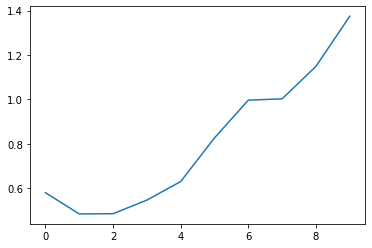

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'])

In [15]:
# rebuild the same model to reset weights

x_seq = tf.keras.layers.Input(shape=(config['sent_max_len']), name='seq_input')

mask = tf.keras.layers.Lambda(Attention.create_padding_mask, output_shape=(1, 1, None))(x_seq)  # padding mask

x1 = tf.keras.layers.Embedding(config['token_num_words'], config['embedding_dim'])(x_seq)
x1 = Attention.PositionalEncoding(config['token_num_words'], config['embedding_dim'])(x1)  # add positional encoding to embedding

x2 = Attention.MultiheadSelfAttention(config['embedding_dim'], config['num_head'])(x1, mask)  # 1st sub-layer of Encoder
x2 = tf.keras.layers.Dropout(0.2)(x2) 
x2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x1 + x2)

x3 = tf.keras.layers.Dense(config['ff_hidden'], activation='relu')(x2)  # 2nd sub-layer of Encoder
x3 = tf.keras.layers.Dropout(0.2)(x3)
x3 = tf.keras.layers.Dense(config['embedding_dim'], activation='relu')(x3)
x3 = tf.keras.layers.Dropout(0.2)(x3)
x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x2 + x3)

x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

y = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)

model = tf.keras.models.Model(inputs=[x_seq], outputs=y)
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x={'seq_input':seq_input}, y=output, epochs=3)

Epoch 1/3
238/238 [==============================] - 7s 29ms/step - loss: 0.6241 - accuracy: 0.6392
Epoch 2/3
238/238 [==============================] - 7s 30ms/step - loss: 0.4711 - accuracy: 0.7844
Epoch 3/3
238/238 [==============================] - 7s 28ms/step - loss: 0.3889 - accuracy: 0.8430


In [17]:
# Apply Preprocssing to Test Data

test_data = pd.read_csv('test.csv')

test_data['text'] = test_data['text'].str.replace('http\S+', 'http', regex=True)
test_data['text'] = test_data['text'].str.replace('&\S+', '', regex=True)
test_data['text'] = test_data['text'].str.replace('[0-9]','0', regex=True)
test_data['text'] = test_data['text'].str.replace('[^a-zA-Z0 ]', '', regex=True)
test_data['text'] = test_data['text'].str.lower()

text_seq = tokenizer.texts_to_sequences(test_data['text'])
test_data.insert(4, 'text_seq', text_seq)
seq_input_test = pad_sequences(test_data['text_seq'], maxlen=config['sent_max_len'], padding='post', truncating='post')


In [18]:
pred = model.predict(x={'seq_input':seq_input_test})
pred = np.asarray(np.rint(pred), dtype=int)
pred[:10]

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [19]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['target'] = pred
submission.head(10)

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [20]:
submission.to_csv('submission5.csv', index=False)
# Accuracy Score : 0.78639